# Introduction to neural network classification with TensorFlow

A classification is where we try to classift something as one thing or another.

* Binary Classification
* Multiclass Classification
* Multilabel Classification

# Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000


# Create circles

x, y = make_circles(n_samples, noise=0.03, random_state=42)

In [2]:
# Check out features

x

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# Check labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [4]:
import pandas as pd

circles = pd.DataFrame({"X0": x[:, 0], "X1": x[:, 1], "label": y} )
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


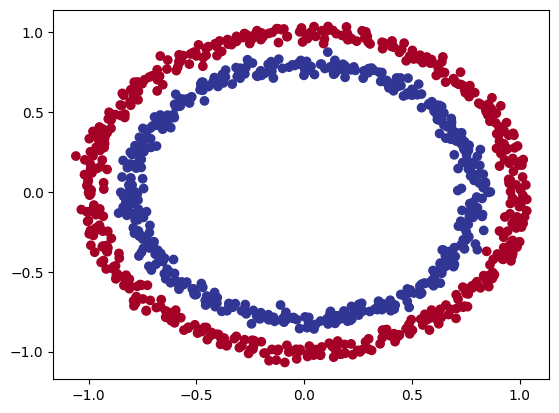

In [5]:
# Visaualize with a plot

import matplotlib.pyplot as plt

plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdYlBu)

Playing around [tensorflow.tensorflow.org](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.85994&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false) networks.

# Input and output shapes

In [6]:
# Check the shapes of our features and labels

x.shape, y.shape

((1000, 2), (1000,))

In [7]:
# Length of samples we are working
len(x), len(y)

(1000, 1000)

In [8]:
# View the first example of features and labels

x[0], y[0]

(array([0.75424625, 0.23148074]), 1)

#Steps in modelling

The steps in modelling with TensorFlow are typically:

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model

In [9]:
import tensorflow as tf

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
]
)

# 2. Compile the model

model_1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["accuracy"]
                )

# 3. Fit the model
model_1.fit(x, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 3ms/step - loss: 6.3374 - accuracy: 0.4880
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 6.2873 - accuracy: 0.4900
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 5.9929 - accuracy: 0.4850
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 5.4750 - accuracy: 0.4620
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 4.3392 - accuracy: 0.4720


In [10]:
# Improve our model by training for longer...

model_1.fit(x, y, epochs=200, verbose=0)
model_1.evaluate(x, y)

32/32 [==============================] - 1s 6ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

Improve our model

In [11]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1),
]
)

# 2. Compile the model

model_2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["accuracy"]
                )

# 3. Fit the model
model_2.fit(x, y, epochs=100, verbose=0)

In [12]:
model_2.evaluate(x, y)

32/32 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.5000


[7.6246185302734375, 0.5]

#Improving our model

In [13]:
# Set Random seed

tf.random.set_seed(42)

# 1. Create model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile Model

model_3.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["accuracy"]
)

# 3. Fit model
model_3.fit(x, y, epochs=100, verbose=0)


In [14]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               300       
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1321 (5.16 KB)
Trainable params: 1321 (5.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
model_3.evaluate(x, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6934 - accuracy: 0.5000


[0.6933580636978149, 0.5]

To visualize our model's predictions, let's create a function `plot_decision_boundary()`, this function will:

* Take a trained model, features (x) and (y)
* Create a meshgrid of different x values
* Make prediction across the meshgrid
* Plot the predictions as well as a line between zones(where each uniques falls).

In [19]:
import numpy as np

def plot_decision_boundary(model, x, y):
  """
  Plots the decision boundary created by a model predicting on x
  """
  # define the axis boundries of the plot and create a meshgrid
  x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1 # O means X-axis
  y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1 # 1 means Y-axis
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

  # Create x value (going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()]  # stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi_class
  if len(y_pred[0]) > 1:
    print("Doing Multicalss Classification")
    # Have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print('Doing Binary Classification')
    y_pred = np.round(y_pred).reshape(xx.shape)
  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(x[:, 0], x[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 2ms/step
Doing Binary Classification


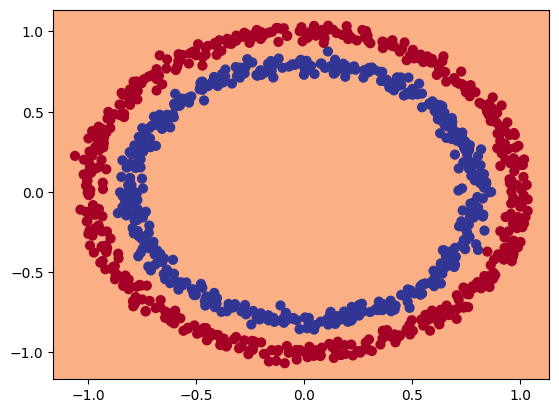

In [20]:
# Check out the predictions our model is making

plot_decision_boundary(model_3, x, y)

Check our model can be used for regression problem

In [26]:
tf.random.set_seed(42)

# Create some regression data
x_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5)

# Split our regression data into training and test sets

x_regression_train = x_regression[:150]
x_regression_test = x_regression[150:]

y_regression_train = y_regression[:150]
y_regression_test = y_regression[150:]

x_regression_train = tf.expand_dims(x_regression_train, axis=1)
x_regression_test = tf.expand_dims(x_regression_test, axis=1)

# Fit our model to the regression data

# Create model

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_4.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

model_4.fit(x_regression_train, y_regression_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 2s 4ms/step - loss: 502.4030 - mae: 502.4030
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 420.8567 - mae: 420.8567
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 343.2854 - mae: 343.2854
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 262.9202 - mae: 262.9202
Epoch 5/100
5/5 [==============================] - 0s 5ms/step - loss: 178.9702 - mae: 178.9702
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 87.2842 - mae: 87.2842
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 55.8789 - mae: 55.8789
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 75.3191 - mae: 75.3191
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 64.2907 - mae: 64.2907
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 45.0983 - mae: 45.0983
Epoch 11/100
5/5 [==============================]

In [28]:
# Make predictions with our trained model

y_regression_preds = model_4.predict(x_regression_test)

2/2 [==============================] - 0s 6ms/step


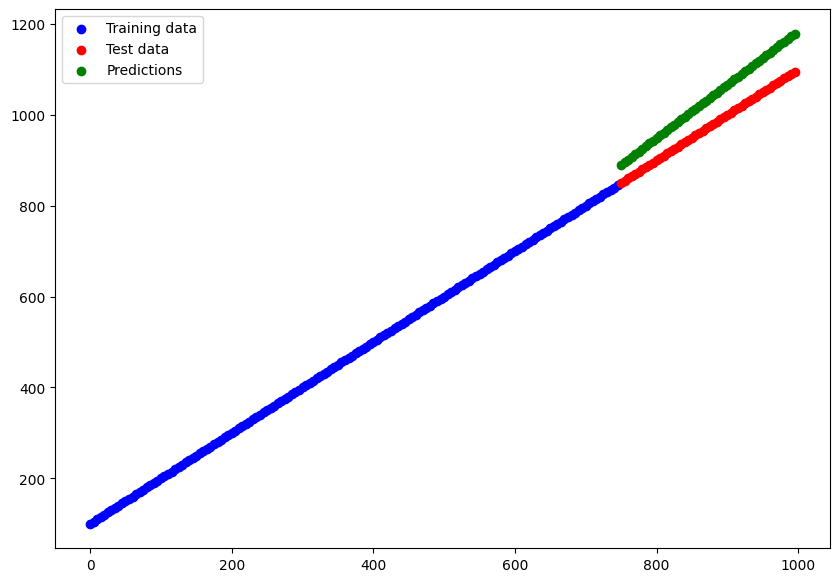

In [30]:
# Plot the model's predictions against our regression data

plt.figure(figsize=(10, 7))
plt.scatter(x_regression_train, y_regression_train, c='b', label="Training data")
plt.scatter(x_regression_test, y_regression_test, c='r', label="Test data")
plt.scatter(x_regression_test, y_regression_preds, c='g', label="Predictions")
plt.legend()

The missing piece: Non-linearity